In [ ]:
# https://github.com/pierre-haessig/ausgrid-solar-data?tab=readme-ov-file
import pandas as pd
import numpy as np


SRC_PATH = "./AusGrid/2012-2013 Solar home electricity data v2.csv"
FIELD = 'Pload_actual'
# FIELD = 'Ppv_actual'

In [ ]:
df = pd.read_csv(SRC_PATH)        
df['Time_actual'] = pd.to_datetime(df['Time_actual'], format='%Y-%m-%d %H:%M:%S')
df['Time'] = df['Time_actual'].dt.strftime("%H:%M:%S")
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
print(df.head())
print(df.dtypes)
# df.Time_actual = pd.to_datetime(df.Time_actual).dt.strftime('%H:%M')
df = df.groupby(pd.Grouper(key='Time', freq='30min')).mean().dropna()          
dst_df = dst_df._append(df[FIELD].T)


['./archive/2021-11-14_data.csv', './archive/2021-12-13_data.csv', './archive/2022-01-03_data.csv', './archive/2022-02-01_data.csv', './archive/2022-03-01_data.csv', './archive/2022-04-01_data.csv', './archive/2022-05-02_data.csv', './archive/2022-06-01_data.csv', './archive/2022-07-01_data.csv', './archive/2022-08-01_data.csv', './archive/2022-09-01_data.csv', './archive/2022-10-03_data.csv', './archive/2022-11-01_data.csv', './archive/2022-12-01_data.csv', './archive/2023-01-01_data.csv', './archive/2023-02-03_data.csv', './archive/2023-03-01_data.csv', './archive/2023-04-04_data.csv', './archive/2023-05-02_data.csv', './archive/2023-06-01_data.csv', './archive/2023-07-01_data.csv', './archive/2023-08-01_data.csv', './archive/2023-09-01_data.csv']
./archive/2021-11-14_data.csv
          Time_actual  Ppv_actual  Qpv_actual  Pload_actual  Qload_actual  \
0 2021-11-14 00:00:26           0           0     64.811157  -1045.206543   
1 2021-11-14 00:00:56           0           0     65.504

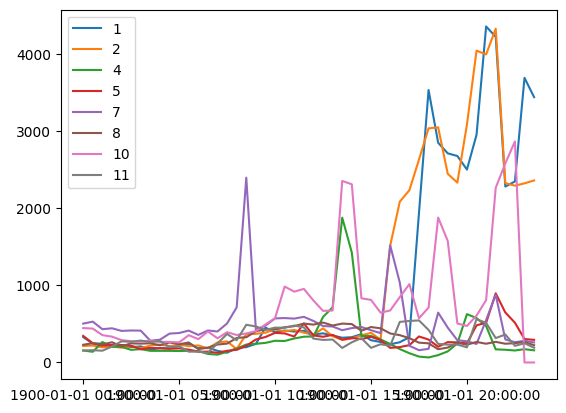

In [151]:
import matplotlib.pyplot as plt
months = [1,2, 4,5, 7,8, 10,11 ]
select = [x+1 for x in months]
df = pd.read_csv(f'{FIELD}.csv').T
df[select].plot()
plt.legend(months)

In [152]:
from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.single_table import CTGANSynthesizer

def train_synthetic_model(name, df):
    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(df)
    metadata.to_dict()

    synthesizer = GaussianCopulaSynthesizer(metadata)
    synthesizer.fit(df)

    synthesizer = CTGANSynthesizer(
        metadata, # required
        enforce_rounding=False,
        epochs=300,
        verbose=True
    )

    synthesizer.get_parameters()
    metadata = synthesizer.get_metadata()
    synthesizer.fit(df)
    synthesizer.save(
        filepath=f'{name}.pkl'
    )

def gen_synthetic_data(name):
    synthesizer = CTGANSynthesizer.load(
        filepath=f'{name}.pkl'
    )

    synthetic_data = synthesizer.sample(num_rows=20)
    synthetic_data.to_csv(f'./{name}_synthetic_data.csv', encoding='utf8', index=False)
    return synthetic_data
    

In [153]:
legends=['1', '4', '7', '10']
df = pd.read_csv(f'{FIELD}.csv').T
# df[[2, 5, 8, 11]].plot()

syn_data = pd.DataFrame()
for i, l in enumerate(legends):
    train_synthetic_model(l, df[[i*3+1, i*3+2]].T)
    syn = gen_synthetic_data(l)
    syn_data = syn_data._append(syn)
    
syn_data.to_csv(f'./{FIELD}_season_synthetic_data.csv', encoding='utf8', index=False)

    

/Users/jwheo/Projects/etc_project/.venv/lib/python3.10/site-packages/sdv/single_table/base.py:120: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/Users/jwheo/Projects/etc_project/.venv/lib/python3.10/site-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
/Users/jwheo/Projects/etc_project/.venv/lib/python3.10/site-packages/sdv/single_table/base.py:120: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
Gen. (4.69) | Discrim. (-0.14): 100%|██████████| 300/300 [00:34<00:00,  8.82it/s]
/Users/jwheo/Projects/etc_project/.venv/lib/python3.10/site-packages/sdv/single_table/base.py:120: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the 

In [154]:
ld = pd.read_csv(f'{FIELD}_season_synthetic_data.csv').T
# ld.plot(legend=False)
data = list()

for l in ld:
    ld_list = ld[l].to_list()
    data.append(ld_list)

ld    

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
1900-01-01 00:00:00,279.041692,281.241938,274.898982,240.710022,330.211994,330.211994,330.211994,313.100100,330.211994,330.211994,...,530.320804,530.320804,530.320804,530.320804,530.320804,530.320804,509.631258,530.320804,530.320804,530.320804
1900-01-01 00:30:00,245.547191,206.125504,224.831340,216.444535,245.547191,245.547191,241.249838,245.547191,201.101435,201.101435,...,408.519949,418.978393,408.519949,440.023079,440.023079,437.264293,420.800484,408.519949,440.023079,436.687101
1900-01-01 01:00:00,238.713564,244.705267,229.079732,237.046241,229.079732,233.434192,229.079732,231.448279,229.079732,229.079732,...,355.041269,410.597603,356.027481,355.041269,408.452510,355.114062,355.041269,355.041269,356.887391,355.041269
1900-01-01 01:30:00,216.993289,218.548957,217.598256,217.815326,218.548957,216.993289,218.548957,216.993289,216.993289,217.919873,...,335.548892,357.626709,335.548892,347.925531,335.548892,339.601385,357.626709,340.138897,335.548892,347.203739
1900-01-01 02:00:00,220.829113,220.829113,220.829113,220.829113,225.489219,262.183403,220.829113,220.829113,220.829113,281.718117,...,290.755414,316.051832,331.789309,316.994971,290.236554,290.236554,290.236554,334.633626,309.916778,290.236554
1900-01-01 02:30:00,200.212165,200.212165,200.212165,216.519264,247.500599,200.212165,210.314877,209.721788,200.212165,217.277389,...,276.666699,337.450501,276.666699,337.450501,337.450501,337.450501,291.308953,305.373021,337.450501,333.567580
1900-01-01 03:00:00,233.916271,217.917301,208.906985,208.906985,259.790014,208.906985,277.763622,208.906985,219.413032,252.263878,...,271.118155,271.118155,271.118155,271.118155,271.118155,271.118155,271.118155,318.729722,510.774538,271.118155
1900-01-01 03:30:00,190.603347,194.549336,271.443507,241.754702,179.119590,165.680556,243.661362,165.680556,271.443507,260.792807,...,282.709259,302.481064,410.454805,430.031090,282.709259,282.709259,430.031090,345.994504,430.031090,430.031090
1900-01-01 04:00:00,196.202817,236.160517,236.160517,186.823829,186.823829,186.823829,186.823829,186.823829,186.823829,236.160517,...,389.428336,389.428336,389.428336,330.610017,389.428336,389.428336,389.428336,389.428336,386.611181,267.742725
1900-01-01 04:30:00,255.116126,255.116126,207.394567,182.682219,182.682219,182.682219,255.116126,253.383342,182.682219,198.511361,...,444.888970,444.888970,389.675695,431.723528,444.888970,341.847921,444.888970,439.731564,444.888970,373.410796


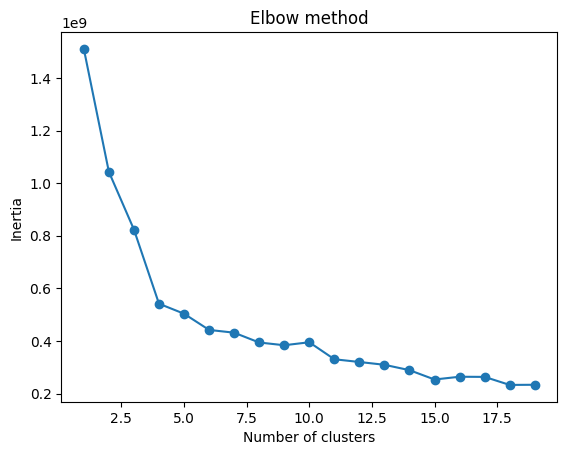

In [155]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

num_cluster = 20
inertias = []
for i in range(1,num_cluster):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,num_cluster), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [156]:
NC = 4
kmeans = KMeans(n_clusters=NC)
kmeans.fit(data)

print(kmeans.labels_)


[0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]


RangeIndex(start=0, stop=80, step=1)


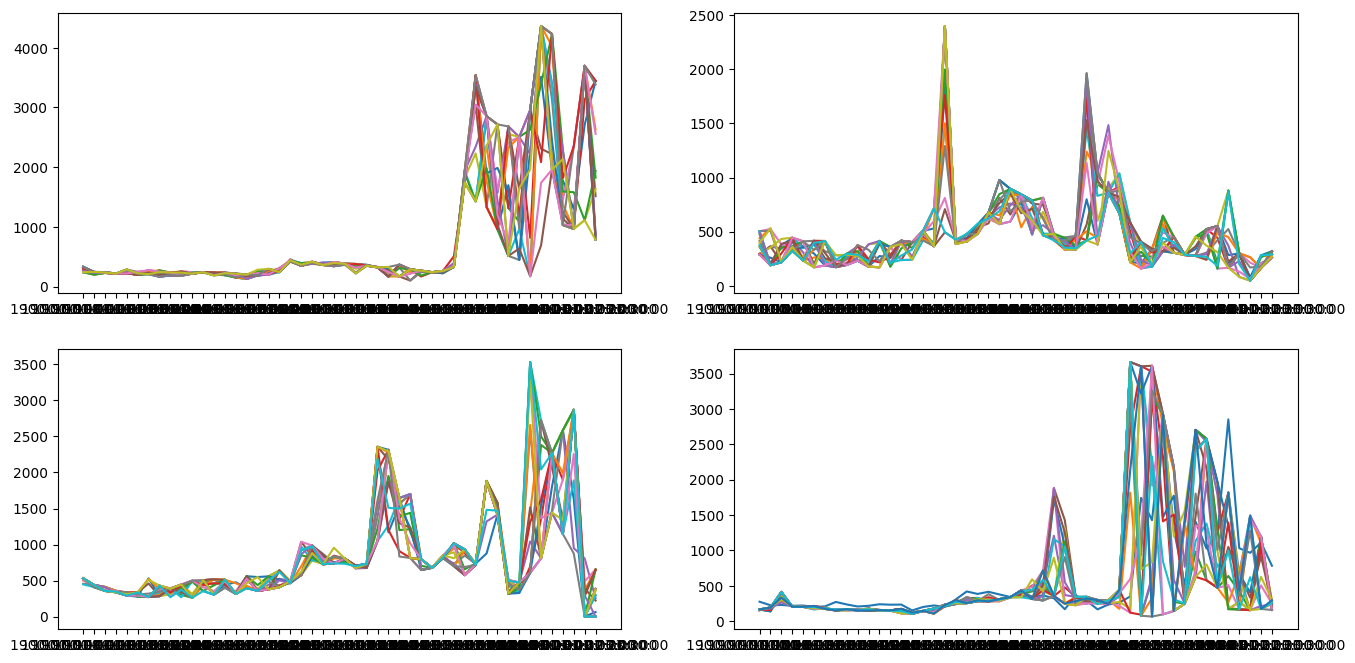

In [157]:
plt.figure(figsize=(16,8))
print(ld.columns)
for i in range(len(ld.columns)):
    plt.subplot(2, 2, kmeans.labels_[i]+1)
    plt.plot(ld[i])